# Training and evaluation of models

This notebook brings everything togehter to let us train and evaluate models in a simple manner. Due to no local GPU resources, this notebook contains code for Google Colab, so it **must be executed in Google Colab**.

<a target="_blank" href="https://colab.research.google.com/github/Moikii/SHEL">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

After downloading an existing dataset, or generating a new one (which takes more time for a large number of images), we can train a model with some custom parameters. Evaluation follows next, where different models performance can be compared.

In [ ]:
!rm -rf sample_data
!git clone https://github.com/Moikii/SHEL.git

Cloning into 'SHEL'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 180 (delta 90), reused 123 (delta 37), pack-reused 0
Receiving objects: 100% (180/180), 17.05 MiB | 22.27 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [ ]:
%%capture
!pip install ultralytics

import sys
import os
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.utils import io
from ultralytics import YOLO
py_file_location = "/content/SHEL/src"
sys.path.append(os.path.abspath(py_file_location))
import dataset_generation_functions as dgf

# otherwise some encoding error occurs for !rm commands
import locale
locale.getpreferredencoding = lambda: "UTF-8"


## Train Model

We can choose, where we want to start the workflow. We can:
- create a new dataset with own parameters
- download a dataset that worked best in our evaluation
- load already trained models to do more detailed evaluation

In [ ]:
# options : 'new_dataset', 'load_dataset', 'load_models'
starting_point = 'load_models'

# only when creating a new dataset
number_of_images = 100
max_number_of_cards_per_image = 6
min_size = 0.1
max_size = 0.8
max_rotation = 360
overlapping = True
seed = 42

# model training parameters
epochs = 1

In [ ]:
# function definitions for model training and basic evaluation
def build_new_dataset():
  !rm -rf dataset
  print('Downloading photos and background from external source...')
  !. /content/SHEL/src/drive_data_download '1KHAYHo9voKRUWtff5ES07hBRUmT7vSg5' 'backgrounds'
  !. /content/SHEL/src/drive_data_download '1o0f3q5zJzfRXs9vSMb1uR9KcUfWtFItZ' 'photos'
  DATASET_DIR = dgf.generate_dataset('/content/backgrounds', '/content/photos', '/content/dataset', number_of_images,
                                     max_number_of_cards_per_image, min_size, max_size, overlapping, seed)
  !rm -rf photos photos_processed backgrounds
  return DATASET_DIR


def load_dataset():
  !rm -rf dataset
  print('Downloading dataset from external source...')
  !. /content/SHEL/src/drive_data_download '10lDY4uO-BiCqfqj8sKR3aWrbwg55blbS' 'dataset'
  DATASET_DIR = '/content/dataset'
  return DATASET_DIR


def load_trained_models():
  !rm -rf dataset
  !rm -rf runs
  print('Downloading trained models from external source...')
  !. /content/SHEL/src/drive_data_download '11EG-pyKCmK_y0614ASnCVq_c1aTNrrtP' 'runs'


def train_model(DATASET_DIR, epochs):
  model = YOLO('yolov8n.pt')
  results = model.train(data = DATASET_DIR + '/data.yaml', epochs = epochs)


def get_results_dataframe(model_run_dir):
  results_df = pd.read_csv(model_run_dir + 'results.csv', usecols=[0,4,5], names = ('epoch', 'precision', 'recall'),
                                  skipinitialspace=True, skiprows = 1, dtype={'recall': float, 'precision': float})
  return results_df


def print_basic_metrics(model_run_dir, results_df):
  best_model_dir = model_run_dir + 'weights/best.pt'
  print(f'\n\nResults of model "{model_run_dir.split("/")[-2]}":')
  print('-----------------------')
  print(f'Number of epochs: {results_df["epoch"].iloc[-1]}')
  print(f'Mean recall at end of training on the test set: {results_df["recall"].iloc[-1]}')
  print(f'Mean precision at end of training on the test set: {results_df["precision"].iloc[-1]}')


def plot_metrics_from_training(precisions_dict, recalls_dict):
  precisions_df = pd.DataFrame(precisions_dict)
  recalls_df = pd.DataFrame(recalls_dict)

  fig, ax =plt.subplots(1,2, figsize = (10, 4))
  sns.lineplot(precisions_df, ax=ax[0])
  ax[0].set(xlabel='epoch', ylabel='precision')
  sns.lineplot(recalls_df, ax=ax[1], legend = False)
  ax[1].set(xlabel='epoch', ylabel='recall')
  sns.move_legend(ax[0], "upper center", bbox_to_anchor=(1, 1.3), ncol=3, title = 'Models', frameon = True)
  fig.show()

In [ ]:
# generate dataset, load dataset or load trained models
if starting_point == 'new_dataset':
  DATASET_DIR = build_new_dataset()
  train_model(DATASET_DIR, epochs)
elif starting_point == 'load_dataset':
  DATASET_DIR = load_dataset()
  train_model(DATASET_DIR, epochs)
elif starting_point == 'load_models':
  load_trained_models()
else: print('Invalid input!')

--2023-11-01 10:06:29--  https://docs.google.com/uc?export=download&confirm=t&id=11EG-pyKCmK_y0614ASnCVq_c1aTNrrtP
Resolving docs.google.com (docs.google.com)... 173.194.174.100, 173.194.174.101, 173.194.174.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.174.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l9h7ksgrd5rf2i2qn1vn3u69q208rjgr/1698833175000/04921794579774064288/*/11EG-pyKCmK_y0614ASnCVq_c1aTNrrtP?e=download&uuid=10a5df5b-78a1-41e4-ba28-e7edcd924826 [following]
--2023-11-01 10:06:30--  https://doc-0o-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l9h7ksgrd5rf2i2qn1vn3u69q208rjgr/1698833175000/04921794579774064288/*/11EG-pyKCmK_y0614ASnCVq_c1aTNrrtP?e=download&uuid=10a5df5b-78a1-41e4-ba28-e7edcd924826
Resolving doc-0o-3k-docs.googleusercontent.com (doc-0o-3k-docs.googleusercontent.com)... 142.251.8.13

## Evaluation

For evaluation we focus on *precision* and *recall*. Because both are important to track a game. Due to the design of our dataset, recall will be lower than precision, because cards can overlapp completely, so they can't ne recognized.

We print precision and recall values of the last epoch for all stored models. Afterwards we plot these two measurements over the number of epochs to compare them better.

In [ ]:
# load models or train a model before evaluating!
precisions_dict = dict()
recalls_dict = dict()


# loop through all trained models in loaded directory
for model_run_dir in glob('/content/runs/detect/*/'):
  results_df = get_results_dataframe(model_run_dir)
  print_basic_metrics(model_run_dir, results_df)

  model_name = model_run_dir.split('/')[-2]
  precisions_dict[model_name] = (results_df['precision'].tolist()[:10])
  recalls_dict[model_name] = (results_df['recall'].tolist()[:10])


--2023-11-01 10:33:57--  https://docs.google.com/uc?export=download&confirm=t&id=11EG-pyKCmK_y0614ASnCVq_c1aTNrrtP
Resolving docs.google.com (docs.google.com)... 142.251.170.101, 142.251.170.113, 142.251.170.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.170.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u96c4v3v9ds3a1bq41oe3cgidhg9m2g6/1698834825000/04921794579774064288/*/11EG-pyKCmK_y0614ASnCVq_c1aTNrrtP?e=download&uuid=0759b48f-e8f8-4f8e-965a-29494bdba9cb [following]
--2023-11-01 10:33:57--  https://doc-0o-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u96c4v3v9ds3a1bq41oe3cgidhg9m2g6/1698834825000/04921794579774064288/*/11EG-pyKCmK_y0614ASnCVq_c1aTNrrtP?e=download&uuid=0759b48f-e8f8-4f8e-965a-29494bdba9cb
Resolving doc-0o-3k-docs.googleusercontent.com (doc-0o-3k-docs.googleusercontent.com)... 142.251.8.13

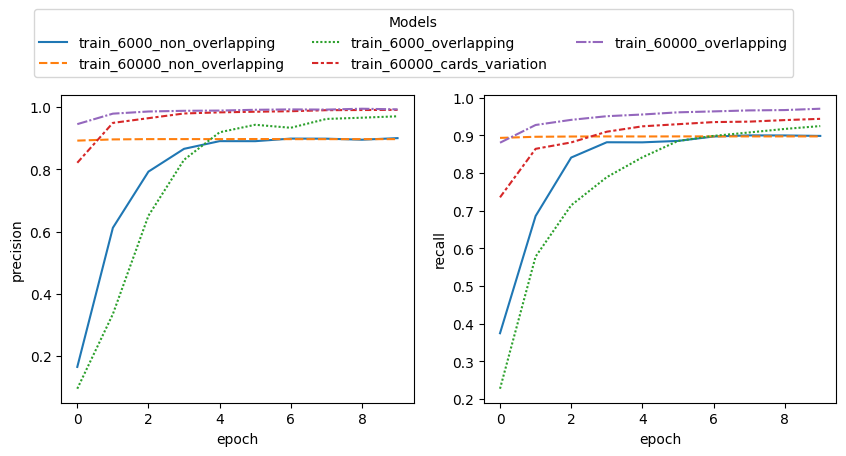

In [ ]:
# plot the two selected metrics for evaluation
plot_metrics_from_training(precisions_dict, recalls_dict)